# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(14,6))

In [2]:
dados = pd.read_csv("dados/aluguel_residencial.csv", sep=";")

<AxesSubplot:>

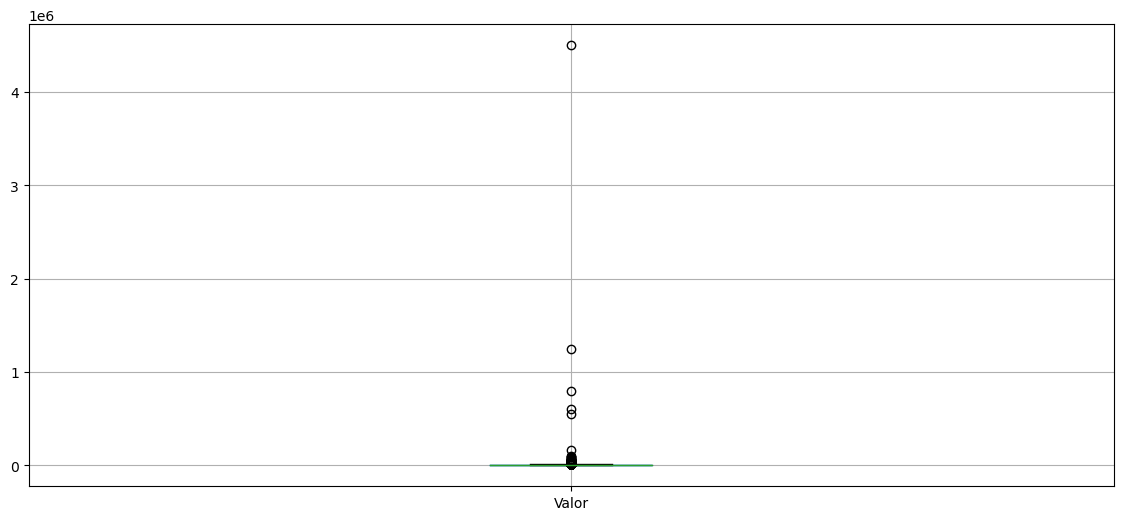

In [6]:
dados.boxplot(["Valor"])

In [8]:
valor = dados["Valor"]

In [12]:
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ = Q3 - Q1
lim_inf = Q1 - 1.5 * IIQ
lim_sup = Q3 + 1.5 * IIQ

<AxesSubplot:>

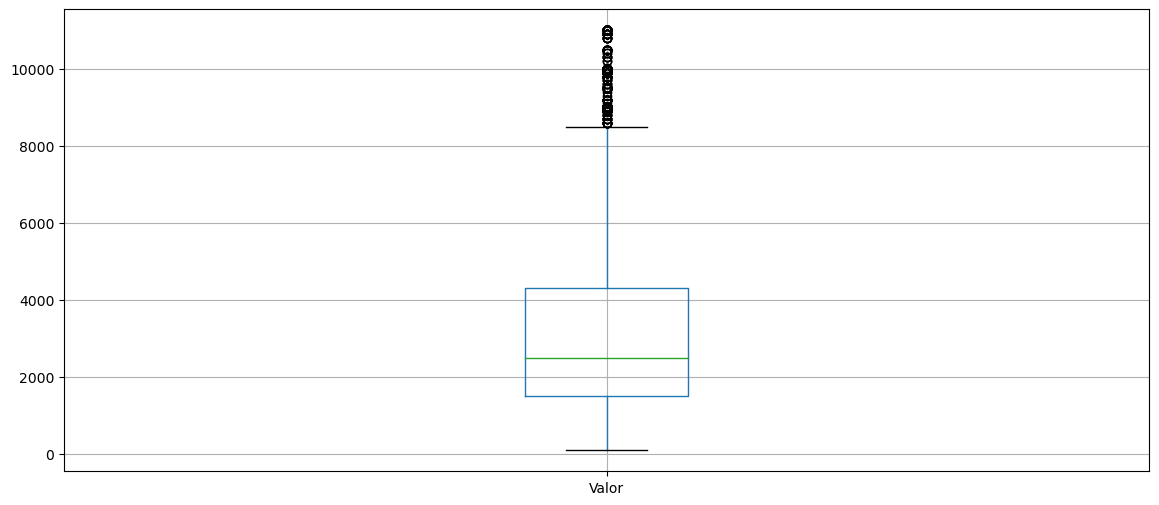

In [15]:
selecao = (valor <= lim_sup) & (valor >= lim_inf)
dados_new = dados[selecao]
dados_new.boxplot(["Valor"])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

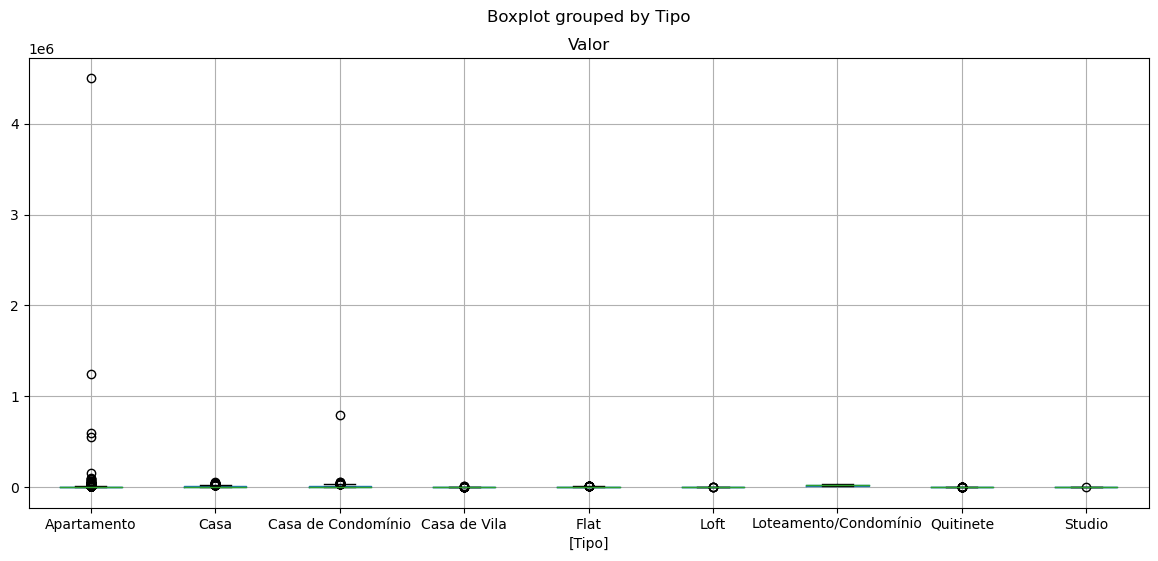

In [18]:
dados.boxplot(["Valor"], by=["Tipo"])

In [25]:
grupo_tipo = dados.groupby("Tipo")["Valor"]
Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(0.75)
IIQ = Q3 - Q1
lim_inf = Q1 - 1.5 * IIQ
lim_sup = Q3 + 1.5 * IIQ

In [26]:
Q1

Tipo
Apartamento               1700.0
Casa                      1100.0
Casa de Condomínio        4000.0
Casa de Vila               750.0
Flat                      2500.0
Loft                      1750.0
Loteamento/Condomínio    14000.0
Quitinete                  900.0
Studio                    1500.0
Name: Valor, dtype: float64

In [34]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_desse_tipo = tipo == dados["Tipo"]
    esta_dentro_do_limite = (dados["Valor"] <= lim_sup[tipo]) & (dados["Valor"] >= lim_inf[tipo])
    selecao = eh_desse_tipo & esta_dentro_do_limite
    dados_desse_tipo_no_limite = dados[selecao]
    dados_new = pd.concat([dados_new, dados_desse_tipo_no_limite])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

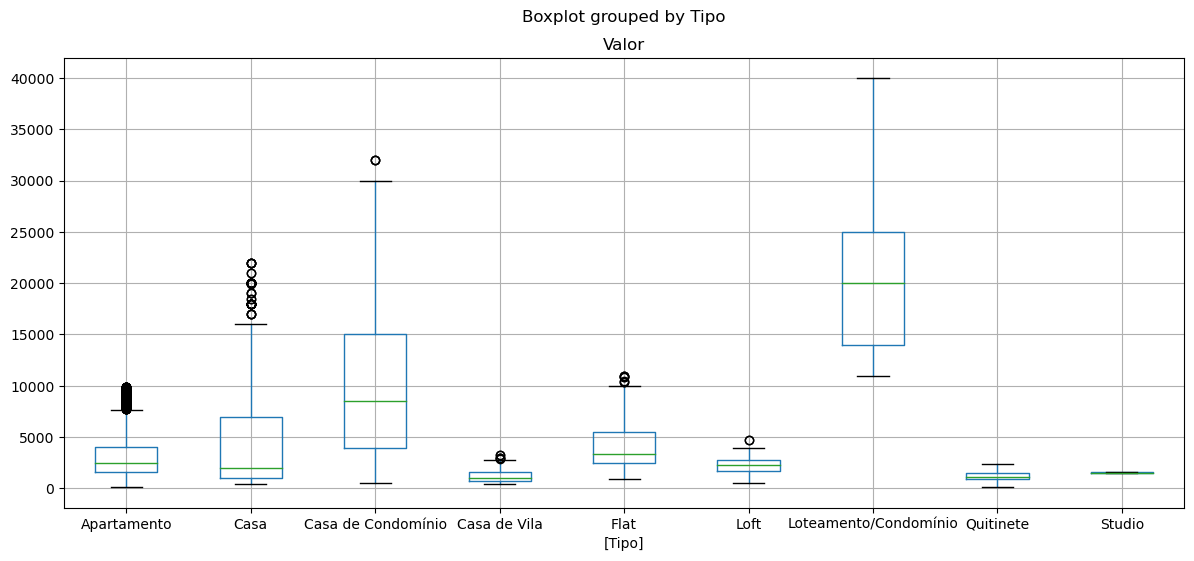

In [36]:
dados_new.boxplot(["Valor"],by=["Tipo"])

In [37]:
dados_new.to_csv("dados/aluguel_residencial_sem_outliers.csv", sep=";", index=False)